# Trabalho 04

Importando o que será usado no trablho

In [1]:
import Trabalho04 as tb

import numpy as np
import matplotlib.pyplot as plt

## Conjunto de dados

1. Usar o conjunto de dados trab4.data.

In [2]:
data = np.loadtxt('datas/trab4.data', delimiter=',')

In [3]:
data.shape

(150, 5)

2. Primeiras 4 colunas são as _features_ das instâncias

3. Última coluna é a variável alvo

In [4]:
X = data[:, :-1]
y = data[:, -1]

## K-means

1. Implemente o k-means usando a distância euclidiana.

> KMeans()

2. Execute o k-means para k ={2,3,4,5}

K-means com k = 2


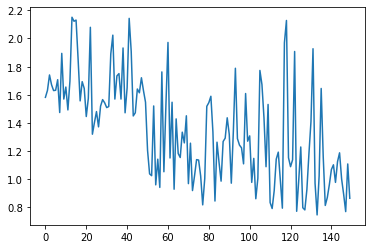

K-means com k = 3


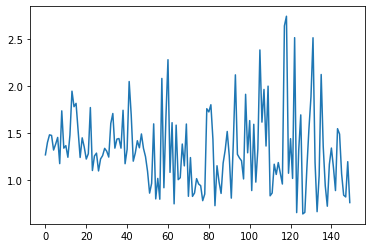

K-means com k = 4


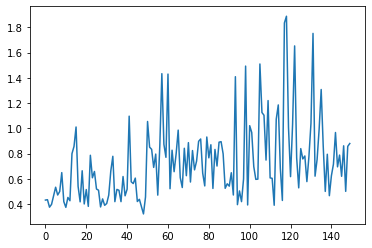

K-means com k = 5


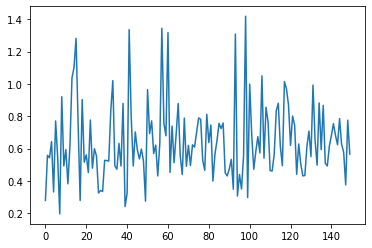

In [5]:
# predicted_kmeans = list()
# mean_distances = list()
for k in range(2,6):
    print('K-means com k =',k)
    kmeans = tb.KMeans(k=k, ite=20)
    kmeans.fit(X)
#     predicted_kmeans.append(kmeans.predict(X))
#     mean_distances.append(kmeans.mean_distance)
    plt.plot(kmeans.mean_distance)
    plt.show()

    a. Plote a distância média de cada ponto para o seu centroideem um gráfico linha em função de k (média sobre 20 rodadas)

Mostrado acima para cada valor de k.

    b. Discuta qual seria o k ideal a ser usado

Cada gráfico acima mostra a distância de cada amostra para o centro do seu cluster. No código é implementado uma forma de calcular essa distância, fazendo a média ao final da execução do algorítmo. Quando a fase do ajuste de algorítmo termina, essas médias são dispostas nos gráficos.

Agora, observando os gráficos, é possível perceber que para cada amostra, quanto mais alto for o valor do eixo y, mais distante essa amostra está do seu cluster. Ao fazer um comparativo entre os gráficos, é notório que os valores máximos no eixo de y é menor para o kmeans com 4 cluster do que para os demais. Neste gráfico é possível perceber que as ocilações tendem a ficar mais controladas dentro de um intervalo mais pequeno. 

Embora saibamos que os dados originalmente possuem 3 rótudos distintos, o gráfico para o kmeans com 4 clusters obteve uma média de distâncias maior do que no gráfico para o kmeans com 4 clusters. Portanto, podemos afirmar que esses dados seriam melhor ajustados entre 4 clusters do que entre 3, como está inicialmente.

## PCA

1. Implemente o PCA

> PCA()

    a. Você deve implementar a função de calcular a matriz de covariância

    b. A função de achar os autovetores e os autovalores pode ser usado pronto do numpy 
> [https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

2. Reduza o conjunto de dados original em um conjunto com apenas duas variáveis (2 componentes principais de maior autovalor)

    a.Reporte quanto de variância foi preservado

In [6]:
pca = tb.PCA(2)
pca.fit(X)
X_transformed = pca.transform(X)

print('Variância preservada', np.sum(pca.variance))

Variância preservada 0.9776317750248036


    b. Plote cada ponto doconjunto transformado em um gráfico de dispersão 2d atribuindo uma cor para cada uma das classes (3 classes no total).

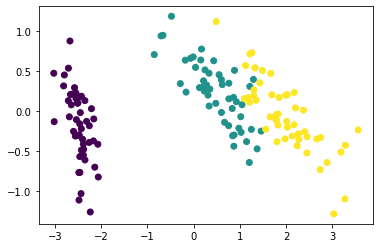

In [7]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.show()

## Árvores de decisão

1. Implemente a árvore de decisão usando o coeficiente de Gini como mostrado em sala

> DecisionTree()

2. Reporte o erro de classificação para o k-fold com k=5

    a. Pode usar o k-fold que foi implementado em atividades passadas ou pode usar pronto do scikit-learn

> Para isso, copiaremos para o arquivo de resolução desse trabalho a parte que implementa a função do K-Fold da prática 3

    b. Erro de classificação pode usar pronto do scikit-learn também

> Assim como ocorrido com o K-Fold, também copiamos a métrica de acurácia para o cálculo do erro da prática 3

`Ps: Entendi esse erro de classificação como sendo a acurácia implementada no trabalho passado também`

In [8]:
kfold = tb.Validation()

In [9]:
# Usando valor 5 para a profundidade máxima da árvore
dt = tb.DecisionTree(max_depth=5)

In [10]:
kfold.kFold(X=X, y=y, k=5, metodo=dt)

[0.06666666666666667, 0.4, 0.0, 0.0, 0.0]

Acima, foi reportado o erro do K-Fold usando um 5-fold para todo o conjunto de dados. O método usado foi o de árvore de decisão.